In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [5]:
XXX = pd.read_csv('DimPatientCoded.csv')
XXX.head()

,Unnamed: 0,Date Announced,Age Bracket,Age,Gender,Detected State,PovertyRate,Current Status,Type of trans,Nationality,Symptoms,JobLoss,FinancialSituation,Diseases,Profession,CovidAfterVaccin,Vaccinated,Reason
0,0,1/30/2020,0,1.0,0,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
1,1,2/2/2020,0,1.0,1,16,7.05,1,1,India,5,0,0,4,2,1,1,0.0
2,2,2/3/2020,0,1.0,1,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
3,3,3/2/2020,0,1.0,1,8,9.91,1,1,India,2,2,0,2,1,0,0,2.0
4,4,3/2/2020,0,1.0,1,31,13.74,1,1,India,2,0,1,4,2,0,0,4.0


In [30]:
XX =  XXX[['Profession','PovertyRate','JobLoss']]
dataset = XX.replace(np.nan,0)
dataset

,Profession,PovertyRate,JobLoss
0,1,7.05,2
1,2,7.05,0
2,1,7.05,2
3,1,9.91,2
4,2,13.74,0
...,...,...,...
247231,1,20.91,2
247232,1,20.91,2
247233,2,20.91,0
247234,2,20.91,0


In [31]:
# Splitting the data into X and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
# Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))

[2]


In [38]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [2 2]
 [2 2]
 ...
 [0 0]
 [2 2]
 [0 1]]


In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test.astype(int), y_pred.astype(int))
print(cm)
accuracy_score(y_test, y_pred)

[[24359  3856     0     0]
 [ 7871 10944     0     0]
 [    0     0 12768    62]
 [ 1072   162   613   102]]


0.7793848792247083

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

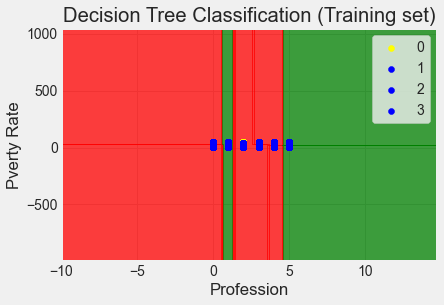

In [41]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('yellow', 'blue'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Profession')
plt.ylabel('Pverty Rate')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

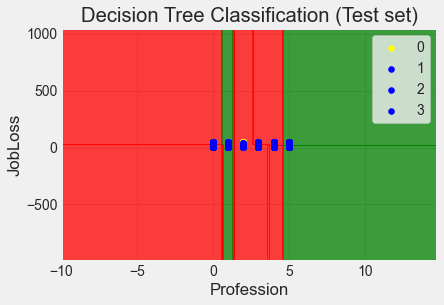

In [43]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('yellow', 'Blue'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Profession')
plt.ylabel('JobLoss')
plt.legend()
plt.show()

In [45]:
df =  XXX[['Current Status','Gender','JobLoss','FinancialSituation','Detected State','PovertyRate','Diseases','Profession','Vaccinated']]
dataset = df.replace(np.nan,0)
dataset

,Current Status,Gender,JobLoss,FinancialSituation,Detected State,PovertyRate,Diseases,Profession,Vaccinated
0,1,0,2,1,16,7.05,4,1,1
1,1,1,0,0,16,7.05,4,2,1
2,1,1,2,1,16,7.05,4,1,1
3,1,1,2,0,8,9.91,2,1,0
4,1,1,0,1,31,13.74,4,2,0
...,...,...,...,...,...,...,...,...,...
247231,1,1,2,0,15,20.91,4,1,1
247232,1,1,2,0,15,20.91,2,1,0
247233,1,1,0,1,15,20.91,2,2,0
247234,1,1,0,1,15,20.91,2,2,1


In [46]:
df.shape


(247236, 9)

In [47]:
df['JobLoss'].value_counts()

0    113447
1     74996
2     51149
3      7644
Name: JobLoss, dtype: int64

In [48]:
print(df['JobLoss'].unique())

[2 0 3 1]


In [49]:
print(df.groupby('JobLoss').size())

JobLoss
0    113447
1     74996
2     51149
3      7644
dtype: int64


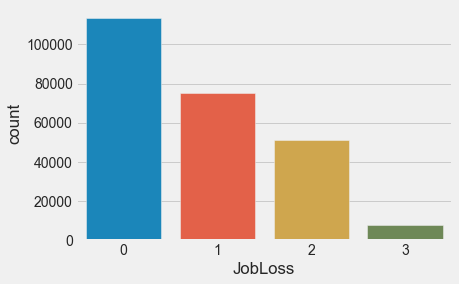

In [50]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.countplot(df['JobLoss'],label="Count")
plt.show()

In [64]:
X = df.drop(['JobLoss'], axis=1)
y = df['JobLoss']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

In [66]:
X_train.head()

,Current Status,Gender,FinancialSituation,Detected State,PovertyRate,Diseases,Profession,Vaccinated
111359,0,1,2,15,20.91,2,1,0
178003,0,1,1,18,31.65,2,3,0
87620,0,1,1,11,11.16,2,4,0
218684,0,1,0,15,20.91,0,0,1
229255,0,1,0,31,13.74,3,1,1


In [67]:
X_test.head()

,Current Status,Gender,FinancialSituation,Detected State,PovertyRate,Diseases,Profession,Vaccinated
168772,1,1,0,15,20.91,4,0,1
197704,1,1,1,15,20.91,1,1,1
29660,0,1,1,1,10.20,1,1,1
78292,0,1,1,18,31.65,1,2,0
232620,2,0,0,15,20.91,0,0,1


In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [74]:
from sklearn.tree import export_graphviz

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test,
y_test)))

NameError: name 'clf_gini' is not defined

In [75]:
from sklearn.tree import export_graphviz
from six import StringIO

import pydot
dot_data = StringIO()
export_graphviz(dtc_model, out_file=dot_data)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree.png")

In [76]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train,y_train))

NameError: name 'clf_gini' is not defined

<Figure size 864x576 with 0 Axes>